## El tratamiento de las variables categóricas

In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("../datasets/ecom-expense/Ecom Expense.csv")

In [4]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


Es una aplicación de Big Data para la parte financiera mas que todo se trata de comparar diferentes comportamientos de usuarios

In [5]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender")

In [6]:
dummy_city_tier= pd.get_dummies(df["City Tier"], prefix="City")

In [7]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [8]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [10]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [11]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [12]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [23]:
feature_cols = ["Monthly Income", "Transaction Time","Gender_Female","Gender_Male",
                "City_Tier 1","City_Tier 2","City_Tier 3","Record"]

In [24]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [25]:
lm = LinearRegression()

In [26]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
lm.intercept_ #Corte con eje de ordenadas

-79.4171303013718

In [28]:
lm.coef_ #Coeficientes para las variables

array([ 1.47538980e-01,  1.54946125e-01, -1.31025013e+02,  1.31025013e+02,
        7.67643260e+01,  5.51389743e+01, -1.31903300e+02,  7.72233446e+02])

In [29]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.15494612549589634),
 ('Gender_Female', -131.02501325554624),
 ('Gender_Male', 131.02501325554607),
 ('City_Tier 1', 76.76432601049513),
 ('City_Tier 2', 55.1389743092325),
 ('City_Tier 3', -131.9033003197277),
 ('Record', 772.2334457445645)]

In [31]:
lm.score(X,Y) #Valor de score representa el R cuadrado, que va de 0 a 1
# Por lo cual teniendo valores de .90 para arriba es un buen modelo

0.9179923586131016

In [33]:
df_new["prediction"] = -79.4171303013718 + df_new["Monthly Income"]*0.14753898049205738 + df_new["Transaction Time"]*0.15494612549589634 + df_new["Gender_Female"]*-131.02501325554624 + df_new["Gender_Male"]*131.02501325554624 + df_new["City_Tier 1"]*76.76432601049513 + df_new["City_Tier 2"]*55.1389743092325 + df_new["City_Tier 3"]*-131.9033003197277 + df_new["Record"]*772.2334457445645

In [34]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [35]:
SSD = np.sum((df_new["prediction"]- df_new["Total Spend"])**2)

In [36]:
SSD

1517733985.340816

In [37]:
RSE = np.sqrt(SSD/len(df_new)- len(feature_cols)-1)

In [38]:
RSE

801.5947080211582

In [39]:
sales_mean= np.mean(df_new["Total Spend"])

In [40]:
sales_mean

6163.176415976714

In [41]:
error= RSE/sales_mean

In [43]:
error*100 #EL porcentaje de error

13.006194434791704

## Transformación de Variables para conseguir una relación no lineal

In [1]:
import pandas as pd

In [2]:
data_auto = pd.read_csv("../datasets/auto/auto-mpg.csv")

In [3]:
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [4]:
data_auto.shape

(406, 9)

In [5]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CV vs MPG')

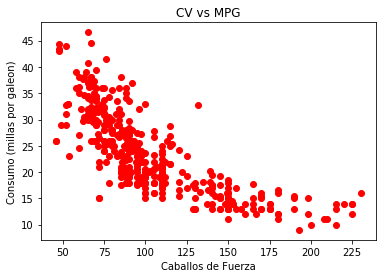

In [8]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()#Para eliminar donde no hay valor
plt.plot(data_auto["horsepower"],data_auto["mpg"],"ro")
plt.xlabel("Caballos de Fuerza")
plt.ylabel("Consumo (millas por galeon)")
plt.title("CV vs MPG")

## Modelo de regresión Lineal
* mpg = a+b *horsepower

In [20]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
X_data = X[:, np.newaxis]

In [16]:
lm = LinearRegression()
lm.fit(X[:, np.newaxis],Y) #Cuando se pasa una sola fila de un dataframe se utiliza esto para que el paquete lo acepte 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
type(X)

pandas.core.series.Series

In [18]:
type(X[:,np.newaxis])

numpy.ndarray

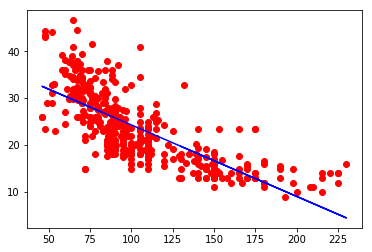

In [19]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X,lm.predict(X[:,np.newaxis]),color="blue")

In [21]:
lm.score(X_data,Y)

0.574653340645025

In [22]:
SSD = np.sum((Y - lm.predict(X_data))**2)

In [23]:
SSD

10315.75196006092

In [24]:
RSE = np.sqrt(SSD/(len(X_data)-1))

In [25]:
RSE

5.046879480825511

In [26]:
y_mean = np.mean(Y)
error = (RSE/y_mean)*100
error

21.46277336163346

## Tratando de mejorar con Modelo Cuadratico
* mpg = a + b*horsepower^2

In [27]:
x_data = X**2
x_data = x_data[:, np.newaxis]

In [28]:
lm = LinearRegression()
lm.fit(x_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
lm.score(x_data, Y)

0.4849887034823205

In [31]:
SSD = np.sum((Y-lm.predict(x_data))**2)
RSE = np.sqrt(SSD/(len(x_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD , RSE, y_mean, error*100

(12490.350340501926, 5.553410772769817, 23.51457286432162, 23.6168898529981)

## Modelo de Regresión Lineal y Cuadratico 
* mpg= a+b*horsepower +c*horsepower^2

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [33]:
poly = PolynomialFeatures(degree=2)

In [34]:
x_data = poly.fit_transform(X[:,np.newaxis])

In [35]:
lm = linear_model.LinearRegression()
lm.fit(x_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
lm.score(x_data,Y)

0.6439066584257469

In [40]:
lm.intercept_

55.02619244708036

In [41]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

### Modelo Obtenido 
* mpg= 55.02619244708036 -0.43404318*hp +0.00112615*hp^2

In [43]:
for d in range(3,6):
    poly = PolynomialFeatures(degree=d)
    x_data = poly.fit_transform(X[:,np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(x_data,Y)
    print(lm.score(x_data,Y))

0.6444678885560744
0.6467674189704502
0.6547512489366876
